## 1.Data preparation
The comparison conducted with the mixture.wav from the track select from the MUSDB18, resampled to 48khz, then manipulated the hum noise and white noise SNR [0, 100]dB,Clipping [0, 100]% and DropOut from [0, 100] occruencetime

Two comparsion method will applied <b>A vs A'C and AC vs A'C</b>

<p></p>

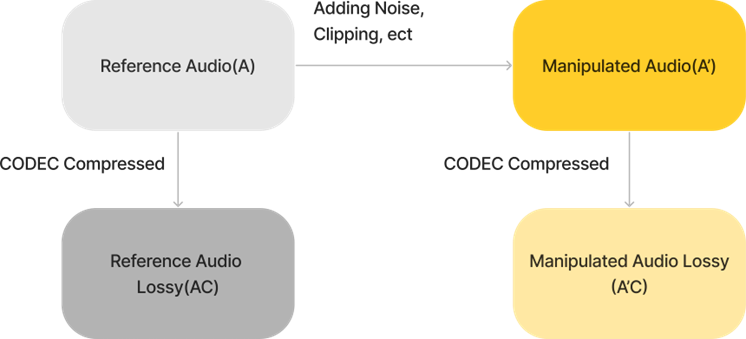

Caution: Make sure the LAME and FFMPEG are installed


### Import Library

In [2]:
import numpy as np
import pandas as pd
from SignalProcessor import SignalProcessorClass
import NoiseEvalUtil as NEUtil
import argparse
import os

In [2]:
import warnings
warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")
warnings.filterwarnings("ignore","Possible clipped samples in output.")

### Basic Configuration

In [3]:
bitrate = 64
HN_Iter = 100
WN_Iter = 100
CP_Iter = 100
DO_Iter = 100


### Calculating the PEAQ_Basic

In [4]:
# Define the top-level directory
base_dir = "/home/codecrack/Jnotebook/DAFX25_48k_16"
# List all first-layer folders
ignore = {
    'Beatles','Britpop','Country1','Country2',
    'Disco','Gospel','Hendrix',
    'Punk','Reggae','Rock','Rockabilly'
}#exclude Grunge

first_layer_dirs = [
    os.path.join(base_dir, name) + '/'
    for name in os.listdir(base_dir)
    if (
       os.path.isdir(os.path.join(base_dir, name))
       and name not in ignore
    )
]
# Print results
for Mixing_Path_48k_16bit in first_layer_dirs:
    Noise_Generator_MP3_48k_16bit = SignalProcessorClass(filename="mixture.wav", foldpath=Mixing_Path_48k_16bit, TrackType = NEUtil.MixingType.File,bitdepth="PCM_16")
    Referece_File_48k_16bit = Noise_Generator_MP3_48k_16bit.TestNoisedOnlyFile([0,0,0,0],"Reference.wav")
    Mp3_Referece_File_48k_16bit = Noise_Generator_MP3_48k_16bit.GeneratingMP3RefFile(Referece_File_48k_16bit, bitrate)

    while (os.path.isfile(Referece_File_48k_16bit) and os.path.isfile(Mp3_Referece_File_48k_16bit)):
        print ("file now ready")
        break
    
    data_point_alterHN_48k_16bit = []
    data_point_alterHN_mp3_48k_16bit = []
    data_point_alterWN_48k_16bit = []
    data_point_alterWN_mp3_48k_16bit = []
    data_point_alterCP_48k_16bit = []
    data_point_alterCP_mp3_48k_16bit = []
    data_point_alterDO_48k_16bit = []
    data_point_alterDO_mp3_48k_16bit = []

    
    for x in range(1,HN_Iter):
        filename = f"Audio_Mixing_HN{str(x)}.wav"
        HN_Gener_Audio = Noise_Generator_MP3_48k_16bit.TestNoisedOnlyFile([x,0,0,0],filename)
        PEAQ_score = Noise_Generator_MP3_48k_16bit.MeasurePEAQOutputsVsRef(HN_Gener_Audio,64,Referece_File_48k_16bit,'basic')
        print(f"HumNoise is {x}dB. The PEAQ value is {PEAQ_score}")
        PEAQ_score_mp3 = Noise_Generator_MP3_48k_16bit.MeasurePEAQOutputsVsRef(HN_Gener_Audio,64,Mp3_Referece_File_48k_16bit,'basic')        
        print(f"HumNoise is {x}dB. The PEAQ value is {PEAQ_score_mp3}")
    #    AK_R_score = round(CaculateAK_roughness(fileUrl),2)
        data_point_alterHN_48k_16bit.append(PEAQ_score)
        data_point_alterHN_mp3_48k_16bit.append(PEAQ_score_mp3)

    
    for x in range(1,WN_Iter):
        filename = f"Audio_Mixing_WN{str(x)}.wav"
        WN_Gener_Audio = Noise_Generator_MP3_48k_16bit.TestNoisedOnlyFile([0,x,0,0],filename)
        PEAQ_score = Noise_Generator_MP3_48k_16bit.MeasurePEAQOutputsVsRef(WN_Gener_Audio,64,Referece_File_48k_16bit,'basic')#print(f"WhitNoise is {x}dB. The PEAQ value is {PEAQ_score}")
        print(f"WhitNoise is {x}dB. The PEAQ value is {PEAQ_score}")
        PEAQ_score_mp3 = Noise_Generator_MP3_48k_16bit.MeasurePEAQOutputsVsRef(WN_Gener_Audio,64,Mp3_Referece_File_48k_16bit,'basic')
        print(f"WhitNoise is {x}dB. The PEAQ value is {PEAQ_score_mp3}")
    #    AK_R_score = round(CaculateAK_roughness(fileUrl),2)
        data_point_alterWN_48k_16bit.append(PEAQ_score)
        data_point_alterWN_mp3_48k_16bit.append(PEAQ_score_mp3)

    for x in range(1,CP_Iter):
        filename = f"Audio_Mixing_CP{str(x)}.wav"
        CP_Gener_Audio = Noise_Generator_MP3_48k_16bit.TestNoisedOnlyFile([0,0,x,0],filename)
        PEAQ_score = Noise_Generator_MP3_48k_16bit.MeasurePEAQOutputsVsRef(CP_Gener_Audio,64,Referece_File_48k_16bit,'basic')
        print(f"CP is {x}dB. The PEAQ value is {PEAQ_score}")
        PEAQ_score_mp3 = Noise_Generator_MP3_48k_16bit.MeasurePEAQOutputsVsRef(CP_Gener_Audio,64,Mp3_Referece_File_48k_16bit,'basic')
        print(f"CP is {x}dB. The PEAQ value is {PEAQ_score_mp3}")
    #    print(f"HumNoise is {x}dB. The PEAQ value is {PEAQ_score}")
    #    AK_R_score = round(CaculateAK_roughness(fileUrl),2)
        data_point_alterCP_48k_16bit.append(PEAQ_score)
        data_point_alterCP_mp3_48k_16bit.append(PEAQ_score_mp3)

    for x in range(1,DO_Iter):
        filename = f"Audio_Mixing_DO{str(x)}.wav"
        DO_Gener_Audio = Noise_Generator_MP3_48k_16bit.TestNoisedOnlyFile([0,0,0,x],filename)
        PEAQ_score = Noise_Generator_MP3_48k_16bit.MeasurePEAQOutputsVsRef(DO_Gener_Audio,64,Referece_File_48k_16bit,'basic')
        print(f"DO is {x}dB. The PEAQ value is {PEAQ_score}")
        PEAQ_score_mp3 = Noise_Generator_MP3_48k_16bit.MeasurePEAQOutputsVsRef(DO_Gener_Audio,64,Mp3_Referece_File_48k_16bit,'basic')
        print(f"DO is {x}dB. The PEAQ value is {PEAQ_score_mp3}")
    #    print(f"Sample Number is {x}. The PEAQ value is {PEAQ_score}")
    #    AK_R_score = round(CaculateAK_roughness(fileUrl),2)
        data_point_alterDO_48k_16bit.append(PEAQ_score)
        data_point_alterDO_mp3_48k_16bit.append(PEAQ_score_mp3)

    df_HN_48k_16bit = pd.DataFrame({'Hum SNR': np.arange(1,HN_Iter,1), 'score': data_point_alterHN_48k_16bit})
    df_HN_48k_16bit = df_HN_48k_16bit.apply(pd.to_numeric, errors='coerce')

    df_HN_48k_16bit_mp3 = pd.DataFrame({'Hum SNR': np.arange(1,HN_Iter,1), 'score': data_point_alterHN_mp3_48k_16bit})
    df_HN_48k_16bit_mp3 = df_HN_48k_16bit_mp3.apply(pd.to_numeric, errors='coerce')

    df_WN_48k_16bit = pd.DataFrame({'WhiteNoise SNR': np.arange(1,WN_Iter,1), 'score': data_point_alterWN_48k_16bit})
    df_WN_48k_16bit = df_WN_48k_16bit.apply(pd.to_numeric, errors='coerce')

    df_WN_48k_16bit_mp3 = pd.DataFrame({'WhiteNoise SNR': np.arange(1,WN_Iter,1), 'score': data_point_alterWN_mp3_48k_16bit})
    df_WN_48k_16bit_mp3 = df_WN_48k_16bit_mp3.apply(pd.to_numeric, errors='coerce')

    df_CP_48k_16bit = pd.DataFrame({'Clipping Percentage(%)': np.arange(1,CP_Iter,1), 'score': data_point_alterCP_48k_16bit})
    df_CP_48k_16bit = df_CP_48k_16bit.apply(pd.to_numeric, errors='coerce')

    df_CP_48k_16bit_mp3 = pd.DataFrame({'Clipping Percentage(%)': np.arange(1,CP_Iter,1), 'score': data_point_alterCP_mp3_48k_16bit})
    df_CP_48k_16bit_mp3 = df_CP_48k_16bit_mp3.apply(pd.to_numeric, errors='coerce')

    df_DO_48k_16bit = pd.DataFrame({'Dropout Num': np.arange(1,DO_Iter,1), 'score': data_point_alterDO_48k_16bit})
    df_DO_48k_16bit = df_DO_48k_16bit.apply(pd.to_numeric, errors='coerce')
    
    df_DO_48k_16bit_mp3 = pd.DataFrame({'Dropout Num': np.arange(1,DO_Iter,1), 'score': data_point_alterDO_mp3_48k_16bit})
    df_DO_48k_16bit_mp3 = df_DO_48k_16bit_mp3.apply(pd.to_numeric, errors='coerce')

    # Combine the dataframes vertically (stacked on top of each other)
    combined_df = pd.concat([df_HN_48k_16bit, df_WN_48k_16bit, df_CP_48k_16bit, df_DO_48k_16bit, df_HN_48k_16bit_mp3, df_WN_48k_16bit_mp3,df_CP_48k_16bit_mp3,df_DO_48k_16bit_mp3], axis=1)
    # Output to CSV
    ##First Four Columns is vs Wav, rest four columns is vs mp3
    combined_df.to_csv(f'{Mixing_Path_48k_16bit}/peaq_basic.csv', index=False)

Audio duration orginal is 13.78125 seconds, now is the 8.0, the audio changing to the MONO
After LUFS, the mixing ouput in the RMS, Total: -9.72dB, Clipping Ratio&Cliped Num: (0.0009088541666666666, 349)
file now ready
After LUFS, the mixing ouput in the RMS, Total: -9.2dB, Clipping Ratio&Cliped Num: (0.0006484375, 249)
HumNoise is 1dB. The PEAQ value is -3.133
HumNoise is 1dB. The PEAQ value is -3.492
After LUFS, the mixing ouput in the RMS, Total: -9.26dB, Clipping Ratio&Cliped Num: (0.0007682291666666666, 295)
HumNoise is 2dB. The PEAQ value is -3.120
HumNoise is 2dB. The PEAQ value is -3.394
After LUFS, the mixing ouput in the RMS, Total: -9.33dB, Clipping Ratio&Cliped Num: (0.0008984375, 345)
HumNoise is 3dB. The PEAQ value is -3.055
HumNoise is 3dB. The PEAQ value is -3.402
After LUFS, the mixing ouput in the RMS, Total: -9.39dB, Clipping Ratio&Cliped Num: (0.0009921875, 381)
HumNoise is 4dB. The PEAQ value is -2.967
HumNoise is 4dB. The PEAQ value is -3.394
After LUFS, the mixin

### Calculating the PEAQ_Advanced

In [5]:
# Define the top-level directory
base_dir = "/home/codecrack/Jnotebook/DAFX25_48k_16"

# List all first-layer folders
ignore = {
    'Beatles','Britpop','Country1','Country2',
    'Disco','Gospel','Hendrix',
    'Punk','Reggae','Rock','Rockabilly'
}#exclude Grunge

first_layer_dirs = [
    os.path.join(base_dir, name) + '/'
    for name in os.listdir(base_dir)
    if (
       os.path.isdir(os.path.join(base_dir, name))
       and name not in ignore
    )
]

# Print results
for Mixing_Path_48k_16bit in first_layer_dirs:
    Noise_Generator_MP3_48k_16bit = SignalProcessorClass(filename="mixture.wav", foldpath=Mixing_Path_48k_16bit, TrackType = NEUtil.MixingType.File,bitdepth="PCM_16")
    Referece_File_48k_16bit = Noise_Generator_MP3_48k_16bit.TestNoisedOnlyFile([0,0,0,0],"Reference.wav")
    Mp3_Referece_File_48k_16bit = Noise_Generator_MP3_48k_16bit.GeneratingMP3RefFile(Referece_File_48k_16bit, bitrate)

    while (os.path.isfile(Referece_File_48k_16bit) and os.path.isfile(Mp3_Referece_File_48k_16bit)):
        print ("file now ready")
        break
    
    data_point_alterHN_48k_16bit = []
    data_point_alterHN_mp3_48k_16bit = []
    data_point_alterWN_48k_16bit = []
    data_point_alterWN_mp3_48k_16bit = []
    data_point_alterCP_48k_16bit = []
    data_point_alterCP_mp3_48k_16bit = []
    data_point_alterDO_48k_16bit = []
    data_point_alterDO_mp3_48k_16bit = []

    
    for x in range(1,HN_Iter):
        filename = f"Audio_Mixing_HN{str(x)}.wav"
        HN_Gener_Audio = Noise_Generator_MP3_48k_16bit.TestNoisedOnlyFile([x,0,0,0],filename)
        PEAQ_adv_score = Noise_Generator_MP3_48k_16bit.MeasurePEAQOutputsVsRef(HN_Gener_Audio,64,Referece_File_48k_16bit,'advanced')
        print(f"HumNoise is {x}dB. The PEAQ ADV value is {PEAQ_adv_score}")
        PEAQ_adv_score_mp3 = Noise_Generator_MP3_48k_16bit.MeasurePEAQOutputsVsRef(HN_Gener_Audio,64,Mp3_Referece_File_48k_16bit,'advanced')        
        print(f"HumNoise is {x}dB. The PEAQ ADV value is {PEAQ_adv_score_mp3}")
    #    AK_R_score = round(CaculateAK_roughness(fileUrl),2)
        data_point_alterHN_48k_16bit.append(PEAQ_adv_score)
        data_point_alterHN_mp3_48k_16bit.append(PEAQ_adv_score_mp3)

    
    for x in range(1,WN_Iter):
        filename = f"Audio_Mixing_WN{str(x)}.wav"
        WN_Gener_Audio = Noise_Generator_MP3_48k_16bit.TestNoisedOnlyFile([0,x,0,0],filename)
        PEAQ_adv_score = Noise_Generator_MP3_48k_16bit.MeasurePEAQOutputsVsRef(WN_Gener_Audio,64,Referece_File_48k_16bit,'advanced')#print(f"WhitNoise is {x}dB. The PEAQ value is {PEAQ_score}")
        print(f"WhitNoise is {x}dB. The PEAQ ADV value is {PEAQ_adv_score}")
        PEAQ_adv_score_mp3 = Noise_Generator_MP3_48k_16bit.MeasurePEAQOutputsVsRef(WN_Gener_Audio,64,Mp3_Referece_File_48k_16bit,'advanced')
        print(f"WhitNoise is {x}dB. The PEAQ ADV value is {PEAQ_adv_score_mp3}")
    #    AK_R_score = round(CaculateAK_roughness(fileUrl),2)
        data_point_alterWN_48k_16bit.append(PEAQ_adv_score)
        data_point_alterWN_mp3_48k_16bit.append(PEAQ_adv_score_mp3)

    for x in range(1,CP_Iter):
        filename = f"Audio_Mixing_CP{str(x)}.wav"
        CP_Gener_Audio = Noise_Generator_MP3_48k_16bit.TestNoisedOnlyFile([0,0,x,0],filename)
        PEAQ_adv_score = Noise_Generator_MP3_48k_16bit.MeasurePEAQOutputsVsRef(CP_Gener_Audio,64,Referece_File_48k_16bit,'advanced')
        print(f"CP is {x}dB. The PEAQ ADV value is {PEAQ_adv_score}")
        PEAQ_adv_score_mp3 = Noise_Generator_MP3_48k_16bit.MeasurePEAQOutputsVsRef(CP_Gener_Audio,64,Mp3_Referece_File_48k_16bit,'advanced')
        print(f"CP is {x}dB. The PEAQ ADV value is {PEAQ_adv_score_mp3}")
    #    print(f"HumNoise is {x}dB. The PEAQ value is {PEAQ_score}")
    #    AK_R_score = round(CaculateAK_roughness(fileUrl),2)
        data_point_alterCP_48k_16bit.append(PEAQ_adv_score)
        data_point_alterCP_mp3_48k_16bit.append(PEAQ_adv_score_mp3)

    for x in range(1,DO_Iter):
        filename = f"Audio_Mixing_DO{str(x)}.wav"
        DO_Gener_Audio = Noise_Generator_MP3_48k_16bit.TestNoisedOnlyFile([0,0,0,x],filename)
        PEAQ_adv_score = Noise_Generator_MP3_48k_16bit.MeasurePEAQOutputsVsRef(DO_Gener_Audio,64,Referece_File_48k_16bit,'advanced')
        print(f"DO is {x}dB. The PEAQ ADV value is {PEAQ_adv_score}")
        PEAQ_adv_score_mp3 = Noise_Generator_MP3_48k_16bit.MeasurePEAQOutputsVsRef(DO_Gener_Audio,64,Mp3_Referece_File_48k_16bit,'advanced')
        print(f"DO is {x}dB. The PEAQ ADV value is {PEAQ_adv_score_mp3}")
    #    print(f"Sample Number is {x}. The PEAQ value is {PEAQ_score}")
    #    AK_R_score = round(CaculateAK_roughness(fileUrl),2)
        data_point_alterDO_48k_16bit.append(PEAQ_adv_score)
        data_point_alterDO_mp3_48k_16bit.append(PEAQ_adv_score_mp3)

    df_HN_48k_16bit = pd.DataFrame({'Hum SNR': np.arange(1,HN_Iter,1), 'score': data_point_alterHN_48k_16bit})
    df_HN_48k_16bit = df_HN_48k_16bit.apply(pd.to_numeric, errors='coerce')

    df_HN_48k_16bit_mp3 = pd.DataFrame({'Hum SNR': np.arange(1,HN_Iter,1), 'score': data_point_alterHN_mp3_48k_16bit})
    df_HN_48k_16bit_mp3 = df_HN_48k_16bit_mp3.apply(pd.to_numeric, errors='coerce')

    df_WN_48k_16bit = pd.DataFrame({'WhiteNoise SNR': np.arange(1,WN_Iter,1), 'score': data_point_alterWN_48k_16bit})
    df_WN_48k_16bit = df_WN_48k_16bit.apply(pd.to_numeric, errors='coerce')

    df_WN_48k_16bit_mp3 = pd.DataFrame({'WhiteNoise SNR': np.arange(1,WN_Iter,1), 'score': data_point_alterWN_mp3_48k_16bit})
    df_WN_48k_16bit_mp3 = df_WN_48k_16bit_mp3.apply(pd.to_numeric, errors='coerce')

    df_CP_48k_16bit = pd.DataFrame({'Clipping Percentage(%)': np.arange(1,CP_Iter,1), 'score': data_point_alterCP_48k_16bit})
    df_CP_48k_16bit = df_CP_48k_16bit.apply(pd.to_numeric, errors='coerce')

    df_CP_48k_16bit_mp3 = pd.DataFrame({'Clipping Percentage(%)': np.arange(1,CP_Iter,1), 'score': data_point_alterCP_mp3_48k_16bit})
    df_CP_48k_16bit_mp3 = df_CP_48k_16bit_mp3.apply(pd.to_numeric, errors='coerce')

    df_DO_48k_16bit = pd.DataFrame({'Dropout Num': np.arange(1,DO_Iter,1), 'score': data_point_alterDO_48k_16bit})
    df_DO_48k_16bit = df_DO_48k_16bit.apply(pd.to_numeric, errors='coerce')
    
    df_DO_48k_16bit_mp3 = pd.DataFrame({'Dropout Num': np.arange(1,DO_Iter,1), 'score': data_point_alterDO_mp3_48k_16bit})
    df_DO_48k_16bit_mp3 = df_DO_48k_16bit_mp3.apply(pd.to_numeric, errors='coerce')

    # Combine the dataframes vertically (stacked on top of each other)
    combined_df = pd.concat([df_HN_48k_16bit, df_WN_48k_16bit, df_CP_48k_16bit, df_DO_48k_16bit, df_HN_48k_16bit_mp3, df_WN_48k_16bit_mp3,df_CP_48k_16bit_mp3,df_DO_48k_16bit_mp3], axis=1)
    # Output to CSV
    ##First Four Columns is vs Wav, rest four columns is vs mp3
    combined_df.to_csv(f'{Mixing_Path_48k_16bit}/peaq_advance.csv', index=False)


Audio duration orginal is 13.78125 seconds, now is the 8.0, the audio changing to the MONO
After LUFS, the mixing ouput in the RMS, Total: -9.72dB, Clipping Ratio&Cliped Num: (0.0009088541666666666, 349)
file now ready
After LUFS, the mixing ouput in the RMS, Total: -9.2dB, Clipping Ratio&Cliped Num: (0.0006484375, 249)
HumNoise is 1dB. The PEAQ ADV value is -2.647
HumNoise is 1dB. The PEAQ ADV value is -0.986
After LUFS, the mixing ouput in the RMS, Total: -9.26dB, Clipping Ratio&Cliped Num: (0.0007682291666666666, 295)
HumNoise is 2dB. The PEAQ ADV value is -1.843
HumNoise is 2dB. The PEAQ ADV value is -0.482
After LUFS, the mixing ouput in the RMS, Total: -9.33dB, Clipping Ratio&Cliped Num: (0.0008984375, 345)
HumNoise is 3dB. The PEAQ ADV value is -1.366
HumNoise is 3dB. The PEAQ ADV value is -0.422
After LUFS, the mixing ouput in the RMS, Total: -9.39dB, Clipping Ratio&Cliped Num: (0.0009921875, 381)
HumNoise is 4dB. The PEAQ ADV value is -1.238
HumNoise is 4dB. The PEAQ ADV value

### Calculating the Visqol

In [6]:
##Loading the necessary Package
import argbind
import torch
from audiotools import AudioSignal
from audiotools import metrics

# Define the top-level directory
base_dir = "/home/codecrack/Jnotebook/DAFX25_48k_16"

# List all first-layer folders
ignore = {
    'Beatles','Britpop','Country1','Country2',
    'Disco','Gospel','Hendrix',
    'Punk','Reggae','Rock','Rockabilly'
}#exclude Grunge

first_layer_dirs = [
    os.path.join(base_dir, name) + '/'
    for name in os.listdir(base_dir)
    if (
       os.path.isdir(os.path.join(base_dir, name))
       and name not in ignore
    )
]

# Print results
for Mixing_Path_48k_16bit in first_layer_dirs:
    Noise_Generator_MP3_48k_16bit = SignalProcessorClass(filename="mixture.wav", foldpath=Mixing_Path_48k_16bit, TrackType = NEUtil.MixingType.File,bitdepth="PCM_16")
    Referece_File_48k_16bit = Noise_Generator_MP3_48k_16bit.TestNoisedOnlyFile([0,0,0,0],"Reference.wav")
    Mp3_Referece_File_48k_16bit = Noise_Generator_MP3_48k_16bit.GeneratingMP3RefFile(Referece_File_48k_16bit, bitrate)
    AudioFold_48k_16bit = Mixing_Path_48k_16bit + '/Mixing_Result_Mp3_Wav/'
    Reference_48k_16bit = AudioSignal(Referece_File_48k_16bit)
    Mp3_Referece_48k_16bit = AudioSignal(Mp3_Referece_File_48k_16bit)

    data_point_alterHN_visqol_48k_16bit = []
    data_point_alterHN_visqol_mp3_48k_16bit = []
    for x in range(1,100):
        filename = f"Audio_Mixing_HN{str(x)}_64kbps.wav"
        HN_Gener_Audio_vis = AudioSignal(AudioFold_48k_16bit+filename)
        Visqol_score = metrics.quality.visqol(Reference_48k_16bit, HN_Gener_Audio_vis).numpy()
        mp3_Visqol_score = metrics.quality.visqol(Mp3_Referece_48k_16bit, HN_Gener_Audio_vis).numpy()
        ODG_score = round(float(Visqol_score-5),2)
        mp3_ODG_score = round(float(mp3_Visqol_score-5),2) 
        print(f"HumNoise is {x}dB. The Visqol value is {ODG_score}")
        print(f"Hum is {x}dB. The Visqol_mp3 value is {mp3_ODG_score}")
        data_point_alterHN_visqol_48k_16bit.append(ODG_score)
        data_point_alterHN_visqol_mp3_48k_16bit.append(mp3_ODG_score)
    
    data_point_alterWN_visqol_48k_16bit = []
    data_point_alterWN_visqol_mp3_48k_16bit = []
    for x in range(1,100):
        filename = f"Audio_Mixing_WN{str(x)}_64kbps.wav"
        WN_Gener_Audio_vis = AudioSignal(AudioFold_48k_16bit+filename)
        Visqol_score = metrics.quality.visqol(Reference_48k_16bit, WN_Gener_Audio_vis).numpy()
        mp3_Visqol_score = metrics.quality.visqol(Mp3_Referece_48k_16bit, WN_Gener_Audio_vis).numpy()
        ODG_score = round(float(Visqol_score-5),2)
        mp3_ODG_score = round(float(mp3_Visqol_score-5),2) 
        print(f"WhiteNoise is {x}dB. The Visqol value is {ODG_score}")
        data_point_alterWN_visqol_48k_16bit.append(ODG_score)
        print(f"WhiteNoise is {x}dB. The Visqol value is {mp3_ODG_score}")
        data_point_alterWN_visqol_mp3_48k_16bit.append(mp3_ODG_score)
    
    
    data_point_alterCP_visqol_48k_16bit = []
    data_point_alterCP_visqol_mp3_48k_16bit = []
    for x in range(1,100):
        filename = f"Audio_Mixing_CP{str(x)}_64kbps.wav"
        CP_Gener_Audio_vis = AudioSignal(AudioFold_48k_16bit+filename)
        Visqol_score = metrics.quality.visqol(Reference_48k_16bit, CP_Gener_Audio_vis).numpy()
        ODG_score = round(float(Visqol_score- 5),2) 
        print(f"Clipping percentage is {x}%. The Visqol value is {ODG_score}")
        data_point_alterCP_visqol_48k_16bit.append(ODG_score)
        mp3_Visqol_score = metrics.quality.visqol(Mp3_Referece_48k_16bit, CP_Gener_Audio_vis).numpy()
        mp3_ODG_score = round(float(mp3_Visqol_score- 5),2) 
        print(f"Clipping percentage is {x}%. The Visqol value is {ODG_score}")
        data_point_alterCP_visqol_mp3_48k_16bit.append(mp3_ODG_score)

  
    data_point_alterDO_visqol_48k_16bit = []
    data_point_alterDO_visqol_mp3_48k_16bit = []
    for x in range(1,100):
        filename = f"Audio_Mixing_DO{str(x)}_64kbps.wav"
        DO_Gener_Audio_vis = AudioSignal(AudioFold_48k_16bit+filename)
        Visqol_score = metrics.quality.visqol(Reference_48k_16bit, DO_Gener_Audio_vis).numpy()
        ODG_score = round(float(Visqol_score- 5),2)
        print(f"Dropout Num is {x}. The Visqol value is {ODG_score}")
    #    AK_R_score = round(CaculateAK_roughness(fileUrl),2)
        data_point_alterDO_visqol_48k_16bit.append(ODG_score)
        mp3_Visqol_score = metrics.quality.visqol(Mp3_Referece_48k_16bit, DO_Gener_Audio_vis).numpy()
        mp3_ODG_score = round(float(mp3_Visqol_score- 5),2)
        print(f"Dropout Num is {x}. The Visqol value is {ODG_score}")
    #    AK_R_score = round(CaculateAK_roughness(fileUrl),2)
        data_point_alterDO_visqol_mp3_48k_16bit.append(mp3_ODG_score)
    

    df_HN_vis_48k_16bit = pd.DataFrame({'Hum SNR': np.arange(1,100,1), 'score': data_point_alterHN_visqol_48k_16bit})
    df_HN_vis_48k_16bit = df_HN_vis_48k_16bit.apply(pd.to_numeric, errors='coerce')
    df_WN_vis_48k_16bit = pd.DataFrame({'WhiteNoise SNR': np.arange(1,100,1), 'score': data_point_alterWN_visqol_48k_16bit})
    df_WN_vis_48k_16bit = df_WN_vis_48k_16bit.apply(pd.to_numeric, errors='coerce')
    df_CP_vis_48k_16bit = pd.DataFrame({'Clipping Percentage(%)': np.arange(1,100,1), 'score': data_point_alterCP_visqol_48k_16bit})
    df_CP_vis_48k_16bit = df_CP_vis_48k_16bit.apply(pd.to_numeric, errors='coerce')
    df_DO_vis_48k_16bit = pd.DataFrame({'Dropout Num': np.arange(1,100,1), 'score': data_point_alterDO_visqol_48k_16bit})
    df_DO_vis_48k_16bit = df_DO_vis_48k_16bit.apply(pd.to_numeric, errors='coerce')
    df_HN_vis_mp3_48k_16bit = pd.DataFrame({'Hum SNR': np.arange(1,100,1), 'score': data_point_alterHN_visqol_mp3_48k_16bit})
    df_HN_vis_mp3_48k_16bit = df_HN_vis_mp3_48k_16bit.apply(pd.to_numeric, errors='coerce')
    df_WN_vis_mp3_48k_16bit = pd.DataFrame({'WhiteNoise SNR': np.arange(1,100,1), 'score': data_point_alterWN_visqol_mp3_48k_16bit})
    df_WN_vis_mp3_48k_16bit = df_WN_vis_mp3_48k_16bit.apply(pd.to_numeric, errors='coerce')
    df_CP_vis_mp3_48k_16bit = pd.DataFrame({'Clipping Percentage(%)': np.arange(1,100,1), 'score': data_point_alterCP_visqol_mp3_48k_16bit})
    df_CP_vis_mp3_48k_16bit = df_CP_vis_mp3_48k_16bit.apply(pd.to_numeric, errors='coerce')
    df_DO_vis_mp3_48k_16bit = pd.DataFrame({'Dropout Num': np.arange(1,100,1), 'score': data_point_alterDO_visqol_mp3_48k_16bit})
    df_DO_vis_mp3_48k_16bit = df_DO_vis_mp3_48k_16bit.apply(pd.to_numeric, errors='coerce')
    # Combine the dataframes vertically (stacked on top of each other)
    combined_df = pd.concat([df_HN_vis_48k_16bit, df_WN_vis_48k_16bit, df_CP_vis_48k_16bit, df_DO_vis_48k_16bit, df_HN_vis_mp3_48k_16bit, df_WN_vis_mp3_48k_16bit,df_CP_vis_mp3_48k_16bit,df_DO_vis_mp3_48k_16bit], axis=1)
    # Output to CSV
    ##First Four Columns is vs Wav, rest four columns is vs mp3
    combined_df.to_csv(f'{Mixing_Path_48k_16bit}/visqol.csv', index=False)

Audio duration orginal is 13.78125 seconds, now is the 8.0, the audio changing to the MONO
After LUFS, the mixing ouput in the RMS, Total: -9.72dB, Clipping Ratio&Cliped Num: (0.0009088541666666666, 349)
HumNoise is 1dB. The Visqol value is -0.96
Hum is 1dB. The Visqol_mp3 value is -0.56
HumNoise is 2dB. The Visqol value is -0.94
Hum is 2dB. The Visqol_mp3 value is -0.53
HumNoise is 3dB. The Visqol value is -0.93
Hum is 3dB. The Visqol_mp3 value is -0.52
HumNoise is 4dB. The Visqol value is -0.92
Hum is 4dB. The Visqol_mp3 value is -0.51
HumNoise is 5dB. The Visqol value is -0.92
Hum is 5dB. The Visqol_mp3 value is -0.53
HumNoise is 6dB. The Visqol value is -0.9
Hum is 6dB. The Visqol_mp3 value is -0.5
HumNoise is 7dB. The Visqol value is -0.89
Hum is 7dB. The Visqol_mp3 value is -0.49
HumNoise is 8dB. The Visqol value is -0.89
Hum is 8dB. The Visqol_mp3 value is -0.48
HumNoise is 9dB. The Visqol value is -0.88
Hum is 9dB. The Visqol_mp3 value is -0.47
HumNoise is 10dB. The Visqol valu

### Calculating the HAAQI

In [7]:
import clarity
import clarity.evaluator.haaqi as haaqi
import librosa

In [8]:
from clarity.utils.audiogram import Audiogram
levels_1 = np.array([0, 0, 0, 0, 0, 0, 0, 0])
audiogram_NH = Audiogram(levels=levels_1)

In [9]:
# Define the top-level directory
base_dir = "/home/codecrack/Jnotebook/DAFX25_48k_16"

# List all first-layer folders
#first_layer_dirs = [
#    os.path.join(base_dir, name) + '/' for name in os.listdir(base_dir)
#    if os.path.isdir(os.path.join(base_dir, name))
#]

ignore = {
    'Beatles','Britpop','Country1','Country2',
    'Disco','Gospel','Hendrix',
    'Punk','Reggae','Rock','Rockabilly'
}#exclude Grunge

first_layer_dirs = [
    os.path.join(base_dir, name) + '/'
    for name in os.listdir(base_dir)
    if (
       os.path.isdir(os.path.join(base_dir, name))
       and name not in ignore
    )
]

# Print results
for Mixing_Path_48k_16bit in first_layer_dirs:
    Noise_Generator_MP3_48k_16bit = SignalProcessorClass(filename="mixture.wav", foldpath=Mixing_Path_48k_16bit, TrackType = NEUtil.MixingType.File,bitdepth="PCM_16")
    Referece_File_48k_16bit = Noise_Generator_MP3_48k_16bit.TestNoisedOnlyFile([0,0,0,0],"Reference.wav")
    Mp3_Referece_File_48k_16bit = Noise_Generator_MP3_48k_16bit.GeneratingMP3RefFile(Referece_File_48k_16bit, bitrate)

    AudioFold_48k_16bit = f'{Mixing_Path_48k_16bit}/Mixing_Result_Mp3_Wav/'
    Mp3_Referece_data_48k_16bit, sample_rate = librosa.load(Mp3_Referece_File_48k_16bit, sr=None) 
    Referece_data_48k_16bit, sample_rate = librosa.load(Referece_File_48k_16bit, sr=None)

    while (os.path.isfile(Referece_File_48k_16bit) and os.path.isfile(Mp3_Referece_File_48k_16bit)):
        print ("file now ready")
        break

    data_point_alterHN_HAAQI_48k_16bit = []
    data_point_alterHN_HAAQI_mp3_48k_16bit = []    
    for x in range(1,100):
        filename = f"Audio_Mixing_HN{str(x)}_64kbps.wav"
        HN_Gener_Audio_HAAQI, sample_rate = librosa.load(AudioFold_48k_16bit+filename, sr=None)
        HAAQI_score = round(haaqi.compute_haaqi(HN_Gener_Audio_HAAQI,Referece_data_48k_16bit,sample_rate,sample_rate,audiogram_NH),2)
    #    ODG_score = round(float(Visqol_score-5),2) 
        print(f"HumNoise is {x}dB. The HAAQI value is {HAAQI_score}")
        data_point_alterHN_HAAQI_48k_16bit.append(HAAQI_score)
        mp3_HAAQI_score = round(haaqi.compute_haaqi(HN_Gener_Audio_HAAQI,Mp3_Referece_data_48k_16bit,sample_rate,sample_rate,audiogram_NH),2)
        print(f"HumNoise is {x}dB. The HAAQI value is {mp3_HAAQI_score}")
        data_point_alterHN_HAAQI_mp3_48k_16bit.append(mp3_HAAQI_score)
    
    data_point_alterWN_HAAQI_48k_16bit = []
    data_point_alterWN_HAAQI_mp3_48k_16bit = []
    for x in range(1,100):
        filename = f"Audio_Mixing_WN{str(x)}_64kbps.wav"
        WN_Gener_Audio_HAAQI, sample_rate = librosa.load(AudioFold_48k_16bit+filename, sr=None)
        HAAQI_score = round(haaqi.compute_haaqi(WN_Gener_Audio_HAAQI,Referece_data_48k_16bit,sample_rate,sample_rate,audiogram_NH),2)
    #    ODG_score = round(float(Visqol_score-5),2) 
        print(f"WhiteNoise is {x}dB. The HAAQI value is {HAAQI_score}")
        data_point_alterWN_HAAQI_48k_16bit.append(HAAQI_score)
        mp3_HAAQI_score = round(haaqi.compute_haaqi(WN_Gener_Audio_HAAQI,Mp3_Referece_data_48k_16bit,sample_rate,sample_rate,audiogram_NH),2)
        print(f"WhiteNoise is {x}dB. The HAAQI value is {mp3_HAAQI_score}")
        data_point_alterWN_HAAQI_mp3_48k_16bit.append(mp3_HAAQI_score)

    data_point_alterCP_HAAQI_48k_16bit = []
    data_point_alterCP_HAAQI_mp3_48k_16bit = []
    for x in range(1,100):
        filename = f"Audio_Mixing_CP{str(x)}_64kbps.wav"
        CP_Gener_Audio_HAAQI, sample_rate = librosa.load(AudioFold_48k_16bit+filename, sr=None)
        HAAQI_score = round(haaqi.compute_haaqi(CP_Gener_Audio_HAAQI,Referece_data_48k_16bit,sample_rate,sample_rate,audiogram_NH),2)
        print(f"Clipping percentage is {x}%. The HAAQI value is {HAAQI_score}")
        data_point_alterCP_HAAQI_48k_16bit.append(HAAQI_score)
        mp3_HAAQI_score = round(haaqi.compute_haaqi(CP_Gener_Audio_HAAQI,Mp3_Referece_data_48k_16bit,sample_rate,sample_rate,audiogram_NH),2)
        print(f"Clipping percentage is {x}%. The HAAQI value is {mp3_HAAQI_score}")
        data_point_alterCP_HAAQI_mp3_48k_16bit.append(mp3_HAAQI_score)




    
    data_point_alterDO_HAAQI_48k_16bit = []
    data_point_alterDO_HAAQI_mp3_48k_16bit = []
    for x in range(1,100):
        filename = f"Audio_Mixing_DO{str(x)}_64kbps.wav"
        DO_Gener_Audio_HAAQI, sample_rate = librosa.load(AudioFold_48k_16bit+filename, sr=None)
        HAAQI_score = round(haaqi.compute_haaqi(DO_Gener_Audio_HAAQI,Referece_data_48k_16bit,sample_rate,sample_rate,audiogram_NH),2)
        print(f"Dropout Num is {x}. The HAAQI value is {HAAQI_score}")
        data_point_alterDO_HAAQI_48k_16bit.append(HAAQI_score)
        mp3_HAAQI_score = round(haaqi.compute_haaqi(DO_Gener_Audio_HAAQI,Mp3_Referece_data_48k_16bit,sample_rate,sample_rate,audiogram_NH),2)
        print(f"Dropout Num is {x}. The HAAQI value is {mp3_HAAQI_score}")
        data_point_alterDO_HAAQI_mp3_48k_16bit.append(mp3_HAAQI_score)

    
    df_HN_HAAQI_48k_16bit = pd.DataFrame({'HumNoise SNR': np.arange(1,100,1), 'score': data_point_alterHN_HAAQI_48k_16bit})
    df_HN_HAAQI_48k_16bit = df_HN_HAAQI_48k_16bit.apply(pd.to_numeric, errors='coerce')
    df_WN_HAAQI_48k_16bit = pd.DataFrame({'WhiteNoise SNR': np.arange(1,100,1), 'score': data_point_alterWN_HAAQI_48k_16bit})
    df_WN_HAAQI_48k_16bit = df_WN_HAAQI_48k_16bit.apply(pd.to_numeric, errors='coerce')
    df_CP_HAAQI_48k_16bit = pd.DataFrame({'Clipping Percentage(%)': np.arange(1,100,1), 'score': data_point_alterCP_HAAQI_48k_16bit})
    df_CP_HAAQI_48k_16bit = df_CP_HAAQI_48k_16bit.apply(pd.to_numeric, errors='coerce')
    df_DO_HAAQI_48k_16bit = pd.DataFrame({'Dropout Num': np.arange(1,100,1), 'score': data_point_alterDO_HAAQI_48k_16bit})
    df_DO_HAAQI_48k_16bit = df_DO_HAAQI_48k_16bit.apply(pd.to_numeric, errors='coerce')
    df_HN_HAAQI_mp3_48k_16bit = pd.DataFrame({'HumNoise SNR': np.arange(1,100,1), 'score': data_point_alterHN_HAAQI_mp3_48k_16bit})
    df_HN_HAAQI_mp3_48k_16bit = df_HN_HAAQI_mp3_48k_16bit.apply(pd.to_numeric, errors='coerce')
    df_WN_HAAQI_mp3_48k_16bit= pd.DataFrame({'WhiteNoise SNR': np.arange(1,100,1), 'score': data_point_alterWN_HAAQI_mp3_48k_16bit})
    df_WN_HAAQI_mp3_48k_16bit = df_WN_HAAQI_mp3_48k_16bit.apply(pd.to_numeric, errors='coerce')
    df_CP_HAAQI_mp3_48k_16bit = pd.DataFrame({'Clipping Percentage(%)': np.arange(1,100,1), 'score': data_point_alterCP_HAAQI_mp3_48k_16bit})
    df_CP_HAAQI_mp3_48k_16bit = df_CP_HAAQI_mp3_48k_16bit.apply(pd.to_numeric, errors='coerce')
    df_DO_HAAQI_mp3_48k_16bit = pd.DataFrame({'Dropout Num': np.arange(1,100,1), 'score': data_point_alterDO_HAAQI_mp3_48k_16bit})
    df_DO_HAAQI_mp3_48k_16bit = df_DO_HAAQI_mp3_48k_16bit.apply(pd.to_numeric, errors='coerce')

    # Combine the dataframes vertically (stacked on top of each other)
    combined_df = pd.concat([df_HN_HAAQI_48k_16bit, df_WN_HAAQI_48k_16bit, df_CP_HAAQI_48k_16bit, df_DO_HAAQI_48k_16bit, df_HN_HAAQI_mp3_48k_16bit, df_WN_HAAQI_mp3_48k_16bit,df_CP_HAAQI_mp3_48k_16bit,df_DO_HAAQI_mp3_48k_16bit], axis=1)
    # Output to CSV
    ##First Four Columns is vs Wav, rest four columns is vs mp3
    combined_df.to_csv(f'{Mixing_Path_48k_16bit}/haaqi.csv', index=False)


Audio duration orginal is 13.78125 seconds, now is the 8.0, the audio changing to the MONO
After LUFS, the mixing ouput in the RMS, Total: -9.72dB, Clipping Ratio&Cliped Num: (0.0009088541666666666, 349)
file now ready
HumNoise is 1dB. The HAAQI value is 0.56
HumNoise is 1dB. The HAAQI value is 0.55
HumNoise is 2dB. The HAAQI value is 0.57
HumNoise is 2dB. The HAAQI value is 0.58
HumNoise is 3dB. The HAAQI value is 0.57
HumNoise is 3dB. The HAAQI value is 0.57
HumNoise is 4dB. The HAAQI value is 0.58
HumNoise is 4dB. The HAAQI value is 0.57
HumNoise is 5dB. The HAAQI value is 0.59
HumNoise is 5dB. The HAAQI value is 0.57
HumNoise is 6dB. The HAAQI value is 0.6
HumNoise is 6dB. The HAAQI value is 0.58
HumNoise is 7dB. The HAAQI value is 0.6
HumNoise is 7dB. The HAAQI value is 0.59
HumNoise is 8dB. The HAAQI value is 0.6
HumNoise is 8dB. The HAAQI value is 0.6
HumNoise is 9dB. The HAAQI value is 0.62
HumNoise is 9dB. The HAAQI value is 0.61
HumNoise is 10dB. The HAAQI value is 0.63
HumNo

In [12]:
AudioFold_48k_16bit+filename

'/home/codecrack/Jnotebook/DAFX25_48k_16/Grunge//Mixing_Result_Mp3_Wav/Audio_Mixing_HN29_64kbps.wav'

### Calculating the PEMO
the PEMO is generated in the Matlab, here the code only reorganise the data.

In [3]:
import numpy as np

base_dir = "/home/codecrack/Jnotebook/DAFX25_48k_16"
# List all first-layer folders
first_layer_dirs = [
    os.path.join(base_dir, name) + '/' for name in os.listdir(base_dir)
    if os.path.isdir(os.path.join(base_dir, name))
]

# Print results
for Mixing_Path_48k_16bit in first_layer_dirs:
    data_point_alterHN_PEMO_48k_16bit = np.loadtxt(f'{Mixing_Path_48k_16bit}/PEMO/HN_PEMOODG.csv', delimiter=',')
    data_point_alterHN_PEMO_mp3_48k_16bit = np.loadtxt(f'{Mixing_Path_48k_16bit}/PEMO/HN_PEMOODG_MP3.csv', delimiter=',')
    df_HN_PEMO_48k_16bit = pd.DataFrame({'Hum SNR': np.arange(1,100,1), 'score': data_point_alterHN_PEMO_48k_16bit})
    df_HN_PEMO_48k_16bit = df_HN_PEMO_48k_16bit.apply(pd.to_numeric, errors='coerce')
    df_HN_PEMO_mp3_48k_16bit = pd.DataFrame({'Hum SNR': np.arange(1,100,1), 'score': data_point_alterHN_PEMO_mp3_48k_16bit})
    df_HN_PEMO_mp3_48k_16bit = df_HN_PEMO_mp3_48k_16bit.apply(pd.to_numeric, errors='coerce')
    
    data_point_alterWN_PEMO_48k_16bit = np.loadtxt(f'{Mixing_Path_48k_16bit}/PEMO/WN_PEMOODG.csv', delimiter=',')
    data_point_alterWN_PEMO_mp3_48k_16bit = np.loadtxt(f'{Mixing_Path_48k_16bit}/PEMO/WN_PEMOODG_MP3.csv', delimiter=',')
    df_WN_PEMO_48k_16bit = pd.DataFrame({'WhiteNoise SNR': np.arange(1,100,1), 'score': data_point_alterWN_PEMO_48k_16bit})
    df_WN_PEMO_48k_16bit = df_WN_PEMO_48k_16bit.apply(pd.to_numeric, errors='coerce')
    df_WN_PEMO_mp3_48k_16bit = pd.DataFrame({'WhiteNoise SNR': np.arange(1,100,1), 'score': data_point_alterWN_PEMO_mp3_48k_16bit})
    df_WN_PEMO_mp3_48k_16bit = df_WN_PEMO_mp3_48k_16bit.apply(pd.to_numeric, errors='coerce')
    
    data_point_alterCP_PEMO_48k_16bit = np.loadtxt(f'{Mixing_Path_48k_16bit}/PEMO/CP_PEMOODG.csv', delimiter=',')
    data_point_alterCP_PEMO_mp3_48k_16bit = np.loadtxt(f'{Mixing_Path_48k_16bit}/PEMO/CP_PEMOODG_MP3.csv', delimiter=',')
    df_CP_PEMO_48k_16bit = pd.DataFrame({'Clipping Percentage': np.arange(1,100,1), 'score': data_point_alterCP_PEMO_48k_16bit})
    df_CP_PEMO_48k_16bit = df_CP_PEMO_48k_16bit.apply(pd.to_numeric, errors='coerce')
    df_CP_PEMO_mp3_48k_16bit = pd.DataFrame({'Clipping Percentage': np.arange(1,100,1), 'score': data_point_alterCP_PEMO_mp3_48k_16bit})
    df_CP_PEMO_mp3_48k_16bit = df_CP_PEMO_mp3_48k_16bit.apply(pd.to_numeric, errors='coerce')
    
    data_point_alterDO_PEMO_48k_16bit = np.loadtxt(f'{Mixing_Path_48k_16bit}/PEMO/DO_PEMOODG.csv', delimiter=',')
    data_point_alterDO_PEMO_mp3_48k_16bit = np.loadtxt(f'{Mixing_Path_48k_16bit}/PEMO/DO_PEMOODG_MP3.csv', delimiter=',')
    df_DO_PEMO_48k_16bit = pd.DataFrame({'Dropout Num': np.arange(1,100,1), 'score': data_point_alterDO_PEMO_48k_16bit})
    df_DO_PEMO_48k_16bit = df_DO_PEMO_48k_16bit.apply(pd.to_numeric, errors='coerce')
    df_DO_PEMO_mp3_48k_16bit = pd.DataFrame({'Dropout Num': np.arange(1,100,1), 'score': data_point_alterDO_PEMO_mp3_48k_16bit})
    df_DO_PEMO_mp3_48k_16bit = df_DO_PEMO_mp3_48k_16bit.apply(pd.to_numeric, errors='coerce')
    
    combined_df = pd.concat([df_HN_PEMO_48k_16bit, df_WN_PEMO_48k_16bit, df_CP_PEMO_48k_16bit, df_DO_PEMO_48k_16bit, df_HN_PEMO_mp3_48k_16bit, df_WN_PEMO_mp3_48k_16bit,df_CP_PEMO_mp3_48k_16bit,df_DO_PEMO_mp3_48k_16bit], axis=1)
    # Output to CSV
    ##First Four Columns is vs Wav, rest four columns is vs mp3
    combined_df.to_csv(f'{Mixing_Path_48k_16bit}/pemo.csv', index=False)